# 1. Formula

Description: x is the number of events, and p is the successful probability.

Probability Density Function:

$$f(x) = (1-p)^{x-1}p$$

CDF: 
$$ f(x) = P(X <= x) = 1-(1-p)^{x}$$

# 2. Geometric Distribution

In [1]:
from scipy.stats import geom
import seaborn as sb

In [2]:
# Random generate a sample data with size = 1000 and p = 0.5 from a Geometric Distribution
r = geom.rvs(p = 0.5, size = 1000)

[Text(0,0.5,'Frequency'),
 Text(0.5,1,'Geometric distribution with size = 1000, p = 0.5')]

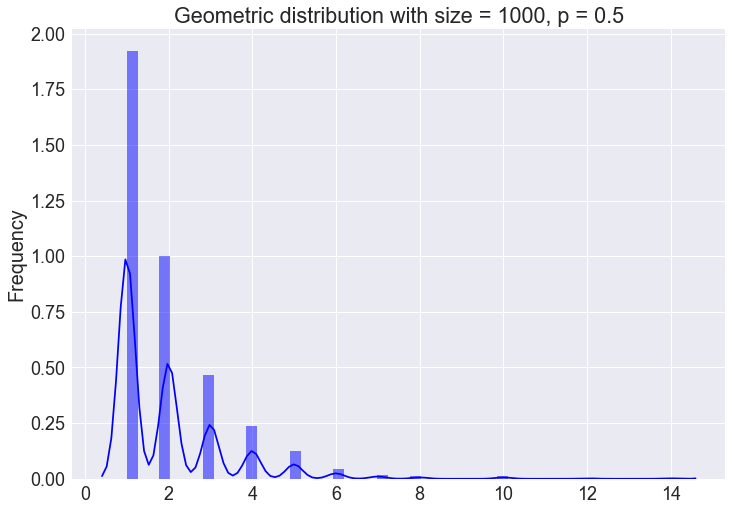

In [3]:
# The shape in a Geometric Distribution is always right skewness 
# Notice: For the Geometric Distribution, there is no upper bound for x-axis
sb.set(rc = {'figure.figsize': (11.7, 8.27)}, font_scale = 1.8)
ax = sb.distplot(r, kde = True, color = 'blue', hist_kws = {"linewidth": 25, 'alpha': 0.5})
ax.set(title = 'Geometric distribution with size = 1000, p = 0.5', ylabel = 'Frequency')

[Text(0,0.5,'Frequency'), Text(0.5,1,'Geometric cumulative distribution')]

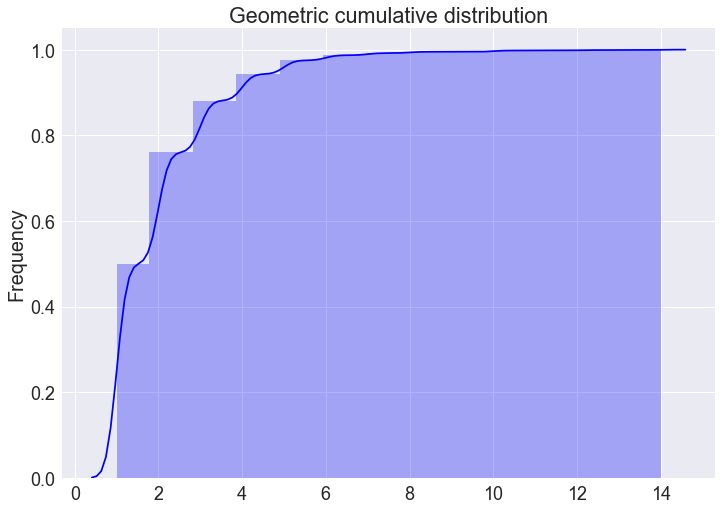

In [4]:
# CDF visualization
sb.set(rc = {'figure.figsize':(11.7, 8.27)}, font_scale = 1.8)
ax = sb.distplot(r, kde = True, color = 'blue',\
                 hist_kws = dict(cumulative = True, alpha = 0.3),\
                 kde_kws = dict(cumulative = True))
ax.set(title = 'Geometric cumulative distribution', ylabel = 'Frequency')

# 3. Statistics of Geometric Distribution

$$E(X) = \frac{1}{p}$$

In [5]:
# The mean will be very close to the formula provided above when increasing the size
r.mean()

1.978

In [6]:
# E(X) = 1/0.5 = 2 
round(geom.rvs(p = 0.5, size = 10000000).mean(), 4)

1.9997

$$Var(X) = \frac{1-p}{p^2}$$

$$Std(X) = \sqrt{Var(X)}$$

In [7]:
# Var(X) = 0.5 / 0.25 = 2
print(round(r.var(), 4))

2.0175


In [8]:
# Std(X) = 2 ** (1/2) = 1.414
print(round(r.std(), 4))

1.4204


In [9]:
# The variance (or standard deviation) will be very close to the formula provided above when increasing the size
print(round(geom.rvs(p = 0.5, size = 10000000).var(), 4))
print(round(geom.rvs(p = 0.5, size = 10000000).std(), 4))

2.0001
1.4142


# 4. Example 
- **In a large population of adults, 30% have received CPR training. If adults from this population are randomly selected, what is the probability that the 6th person sampled is the first that has received CPR training?**

In [10]:
# To answer the question, we can use the pdf.
print('The probability that the 6th person is the first that has received CPR training is', 
      round(geom.pmf(k = 6, p = 0.3, loc = 0), 4))

The probability that the 6th person is the first that has received CPR training is 0.0504


- **What is the probability that the first person trained in CPR occurs on or before the 3rd person sampled?**

In [11]:
# To answer the question, we can use the cdf.
print('The probability that the first person trained in CPR \
occurs on or before the 3rd person sampled is',
    round(geom.cdf(3, 0.3, loc=0), 4))

The probability that the first person trained in CPR occurs on or before the 3rd person sampled is 0.657


In [12]:
# Or, we can use another way to solve this question by adding up the pdf from x = 1 to x = 3.
round(geom.pmf(k = 1, p = 0.3, loc = 0), 4) + round(geom.pmf(k = 2, p = 0.3, loc = 0), 4) + \
round(geom.pmf(k = 3, p = 0.3, loc = 0), 4)

0.657

In [13]:
# If we are interested in looking back the original x variable,
# we can use ppf (the inverse of the cdf) to find the x variable.
geom.ppf(q = 0.657, p = 0.3, loc = 0)

3.0